In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/epilepsy-seizure-dataset-seina-scalp-complete/siena-scalp-eeg-database-1.0.0/SHA256SUMS.txt
/kaggle/input/epilepsy-seizure-dataset-seina-scalp-complete/siena-scalp-eeg-database-1.0.0/RECORDS
/kaggle/input/epilepsy-seizure-dataset-seina-scalp-complete/siena-scalp-eeg-database-1.0.0/subject_info.csv
/kaggle/input/epilepsy-seizure-dataset-seina-scalp-complete/siena-scalp-eeg-database-1.0.0/LICENSE.txt
/kaggle/input/epilepsy-seizure-dataset-seina-scalp-complete/siena-scalp-eeg-database-1.0.0/PN05/Seizures-list-PN05.txt
/kaggle/input/epilepsy-seizure-dataset-seina-scalp-complete/siena-scalp-eeg-database-1.0.0/PN05/PN05-2.edf
/kaggle/input/epilepsy-seizure-dataset-seina-scalp-complete/siena-scalp-eeg-database-1.0.0/PN05/PN05-4.edf
/kaggle/input/epilepsy-seizure-dataset-seina-scalp-complete/siena-scalp-eeg-database-1.0.0/PN05/PN05-3.edf
/kaggle/input/epilepsy-seizure-dataset-seina-scalp-complete/siena-scalp-eeg-database-1.0.0/PN00/PN00-1.edf
/kaggle/input/epilepsy-seizure-datase

In [2]:
pip install pyedflib imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 32.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 99.0 MB/s eta 0:00:00:00:010:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, but you have scikit-learn 1.6.1 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [3]:
# import os
# import re
# import numpy as np
# import pyedflib
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report
# from imblearn.over_sampling import SMOTE

# def time_to_sec(t_str):
#     t_str = t_str.strip().replace(":", ".")
#     h, m, s = map(int, t_str.split("."))
#     return h * 3600 + m * 60 + s

# def parse_summary(file_path):
#     with open(file_path, "r") as f:
#         content = f.read()

#     seizure_data = []

#     file_blocks = re.findall(r"Seizure n[\w ]*:?[\s\S]*?File name:\s*(\S+\.edf)[\s\S]*?Registration start time:\s*(\d+.\d+.\d+)[\s\S]*?Registration end time:\s*(\d+.\d+.\d+)[\s\S]*?Seizure start time:\s*(\d+.\d+.\d+)[\s\S]*?Seizure end time:\s*(\d+.\d+.\d+)", content)
    
#     single_file_match = re.search(r"File name:\s*(PN\d+\.edf)", content)
#     if single_file_match:
#         edf_file = single_file_match.group(1)
#         try:
#             start_time = re.search(r"Registration start time:\s*(\d+\.\d+\.\d+)", content).group(1)
#             end_time = re.search(r"Registration end time:\s*(\d+\.\d+\.\d+)", content).group(1)
#             seizure_only_blocks = re.findall(r"Seizure n \d+\s+Start time:\s*(\d+[:.]\d+[:.]\d+)\s+End time:\s*(\d+[:.]\d+[:.]\d+)", content)
#             for s_start, s_end in seizure_only_blocks:
#                 seizure_data.append({
#                     "edf_file": edf_file,
#                     "recording_start": time_to_sec(start_time),
#                     "recording_end": time_to_sec(end_time),
#                     "seizure_start": time_to_sec(s_start),
#                     "seizure_end": time_to_sec(s_end),
#                     "preseizure_start": max(time_to_sec(s_start) - 900, 0)
#                 })
#         except:
#             pass

#     for file, start, end, sz_start, sz_end in file_blocks:
#         seizure_data.append({
#             "edf_file": file,
#             "recording_start": time_to_sec(start),
#             "recording_end": time_to_sec(end),
#             "seizure_start": time_to_sec(sz_start),
#             "seizure_end": time_to_sec(sz_end),
#             "preseizure_start": max(time_to_sec(sz_start) - 900, 0)
#         })

#     return seizure_data

# def extract_channels(file_path, channels=[0, 1, 2, 3]):
#     f = pyedflib.EdfReader(file_path)
#     n_samples = f.getNSamples()[0]
#     data = np.zeros((len(channels), n_samples))
#     for i, ch in enumerate(channels):
#         data[i, :] = f.readSignal(ch)
#     f._close()
#     return data

# def extract_features(signal):
#     feats = []
#     for ch in signal:
#         feats.extend([
#             np.mean(ch), np.std(ch), np.min(ch), np.max(ch),
#             np.percentile(ch, 25), np.percentile(ch, 75)
#         ])
#     return feats

# def segment_and_extract(data, info, fs=512, window_sec=10):
#     window_size = fs * window_sec
#     total_windows = data.shape[1] // window_size
#     X, y = [], []

#     for i in range(total_windows):
#         start = i * window_size
#         end = start + window_size
#         global_time = info["recording_start"] + start // fs

#         if info["seizure_start"] <= global_time < info["seizure_end"]:
#             label = 2
#         elif info["preseizure_start"] <= global_time < info["seizure_start"]:
#             label = 1
#         else:
#             label = 0

#         segment = data[:, start:end]
#         X.append(extract_features(segment))
#         y.append(label)

#     return np.array(X), np.array(y)

# def build_dataset(summary_data, edf_folder):
#     X_all, y_all = [], []
#     for info in summary_data:
#         edf_path = os.path.join(edf_folder, info["edf_file"])
#         if not os.path.exists(edf_path):
#             print(f"⚠️ Missing EDF: {edf_path}")
#             continue
#         try:
#             data = extract_channels(edf_path)
#             X, y = segment_and_extract(data, info)
#             X_all.append(X)
#             y_all.append(y)
#         except Exception as e:
#             print(f"❌ Error in {info['edf_file']}: {e}")
#     if not X_all:
#         return None, None
#     return np.concatenate(X_all), np.concatenate(y_all)




In [4]:
# import joblib
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report, confusion_matrix
# from imblearn.over_sampling import SMOTE
# import seaborn as sns
# import matplotlib.pyplot as plt
# import numpy as np

# def train_random_forest(X, y):
#     print("\n📊 Original label distribution:", np.bincount(y))

#     # ⚖️ Use SMOTE with controlled sampling
#     smote = SMOTE(sampling_strategy={0: 33397  , 1: 33397  , 2: 33397  }, random_state=42)
#     X_res, y_res = smote.fit_resample(X, y)
#     print("✅ After SMOTE label distribution:", np.bincount(y_res))

#     # 🔀 Split data
#     X_trainval, X_test, y_trainval, y_test = train_test_split(
#         X_res, y_res, stratify=y_res, test_size=0.1, random_state=42)
#     X_train, X_val, y_train, y_val = train_test_split(
#         X_trainval, y_trainval, stratify=y_trainval, test_size=0.2, random_state=42)

#     # 🌲 Random Forest with regularization
#     clf = RandomForestClassifier(
#         n_estimators=100,
#         max_depth=15,
#         min_samples_split=10,
#         min_samples_leaf=5,
#         max_features='sqrt',
#         class_weight='balanced_subsample',
#         random_state=42
#     )

#     # 🏋️‍♂️ Train
#     clf.fit(X_train, y_train)

#     # 📈 Training Evaluation
#     print("\n📈 Training Set Evaluation")
#     print(classification_report(
#         y_train, clf.predict(X_train),
#         target_names=["Non-Seizure", "Pre-Seizure", "Seizure"]
#     ))

#     # ✅ Validation Evaluation
#     print("\n✅ Validation Report")
#     print(classification_report(
#         y_val, clf.predict(X_val),
#         target_names=["Non-Seizure", "Pre-Seizure", "Seizure"]
#     ))

#     # 🧪 Final Test
#     y_test_pred = clf.predict(X_test)
#     print("\n🧪 Test Report")
#     print(classification_report(
#         y_test, y_test_pred,
#         target_names=["Non-Seizure", "Pre-Seizure", "Seizure"]
#     ))

#     # 🔍 Confusion Matrix
#     cm = confusion_matrix(y_test, y_test_pred)
#     plt.figure(figsize=(6, 4))
#     sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
#                 xticklabels=["Non-Seizure", "Pre-Seizure", "Seizure"],
#                 yticklabels=["Non-Seizure", "Pre-Seizure", "Seizure"])
#     plt.title("Test Confusion Matrix")
#     plt.xlabel("Predicted")
#     plt.ylabel("Actual")
#     plt.tight_layout()
#     plt.show()

#     # 💾 Save model
#     joblib.dump(clf, "random_forest_model.pkl")
#     print("💾 Model saved as random_forest_model.pkl")


In [5]:

# if __name__ == "__main__":
#     base_folder = "/kaggle/input/epilepsy-seizure-dataset-seina-scalp-complete/siena-scalp-eeg-database-1.0.0"
#     X_all, y_all = [], []

#     for subdir in os.listdir(base_folder):
#         subpath = os.path.join(base_folder, subdir)
#         if not os.path.isdir(subpath):
#             continue

#         summary_files = [f for f in os.listdir(subpath) if f.startswith("Seizures-list") and f.endswith(".txt")]
#         if not summary_files:
#             continue

#         summary_path = os.path.join(subpath, summary_files[0])
#         print(f"\n📁 Processing: {summary_path}")
#         try:
#             summary_data = parse_summary(summary_path)
#             X, y = build_dataset(summary_data, subpath)
#             if X is not None:
#                 X_all.append(X)
#                 y_all.append(y)
#         except Exception as e:
#             print(f"❌ Failed on {summary_path}: {e}")

#     if X_all:
#         X_all = np.concatenate(X_all)
#         y_all = np.concatenate(y_all)
#         print(f"\n✅ Final Dataset: {X_all.shape[0]} samples, {X_all.shape[1]} features")
#         train_random_forest(X_all, y_all)
#     else:
#         print("❌ No valid data found.")


In [6]:
import os
import re
import numpy as np
import pyedflib
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

def time_to_sec(t_str):
    t_str = t_str.strip().replace(":", ".")
    h, m, s = map(int, t_str.split("."))
    return h * 3600 + m * 60 + s

def parse_summary(file_path):
    with open(file_path, "r") as f:
        content = f.read()

    seizure_data = []

    file_blocks = re.findall(r"Seizure n[\w ]*:?[\s\S]*?File name:\s*(\S+\.edf)[\s\S]*?Registration start time:\s*(\d+.\d+.\d+)[\s\S]*?Registration end time:\s*(\d+.\d+.\d+)[\s\S]*?Seizure start time:\s*(\d+.\d+.\d+)[\s\S]*?Seizure end time:\s*(\d+.\d+.\d+)", content)
    
    single_file_match = re.search(r"File name:\s*(PN\d+\.edf)", content)
    if single_file_match:
        edf_file = single_file_match.group(1)
        try:
            start_time = re.search(r"Registration start time:\s*(\d+\.\d+\.\d+)", content).group(1)
            end_time = re.search(r"Registration end time:\s*(\d+\.\d+\.\d+)", content).group(1)
            seizure_only_blocks = re.findall(r"Seizure n \d+\s+Start time:\s*(\d+[:.]\d+[:.]\d+)\s+End time:\s*(\d+[:.]\d+[:.]\d+)", content)
            for s_start, s_end in seizure_only_blocks:
                seizure_data.append({
                    "edf_file": edf_file,
                    "recording_start": time_to_sec(start_time),
                    "recording_end": time_to_sec(end_time),
                    "seizure_start": time_to_sec(s_start),
                    "seizure_end": time_to_sec(s_end),
                    "preseizure_start": max(time_to_sec(s_start) - 900, 0)
                })
        except:
            pass

    for file, start, end, sz_start, sz_end in file_blocks:
        seizure_data.append({
            "edf_file": file,
            "recording_start": time_to_sec(start),
            "recording_end": time_to_sec(end),
            "seizure_start": time_to_sec(sz_start),
            "seizure_end": time_to_sec(sz_end),
            "preseizure_start": max(time_to_sec(sz_start) - 900, 0)
        })

    return seizure_data

def extract_channels(file_path, channels=[0, 1, 2, 3]):
    f = pyedflib.EdfReader(file_path)
    n_samples = f.getNSamples()[0]
    data = np.zeros((len(channels), n_samples))
    for i, ch in enumerate(channels):
        data[i, :] = f.readSignal(ch)
    f._close()
    return data

from scipy.signal import welch
from scipy.stats import entropy as scipy_entropy
import pywt
import numpy as np

def extract_features(signal, fs=512):
    feats = []

    for ch in signal:
        # Time-domain stats
        mean_val = np.mean(ch)
        std_val = np.std(ch)
        min_val = np.min(ch)
        max_val = np.max(ch)
        q25 = np.percentile(ch, 25)
        q75 = np.percentile(ch, 75)

        # Frequency-domain stats using Welch's method
        freqs, psd = welch(ch, fs=fs)
        band_power = lambda fmin, fmax: np.sum(psd[(freqs >= fmin) & (freqs < fmax)])
        delta = band_power(0.5, 4)
        theta = band_power(4, 8)
        alpha = band_power(8, 13)
        beta = band_power(13, 30)
        gamma = band_power(30, 45)

        # Shannon entropy
        hist, _ = np.histogram(ch, bins=50, density=True)
        hist += 1e-12  # Avoid log(0)
        shannon = -np.sum(hist * np.log2(hist))

        # Wavelet energy (Discrete Wavelet Transform)
        coeffs = pywt.wavedec(ch, 'db4', level=3)
        wavelet_energies = [np.sum(np.square(c)) for c in coeffs]

        feats.extend([
            mean_val, std_val, min_val, max_val, q25, q75,
            delta, theta, alpha, beta, gamma,
            shannon, *wavelet_energies
        ])

    return feats


def segment_and_extract(data, info, fs=512, window_sec=10):
    window_size = fs * window_sec
    total_windows = data.shape[1] // window_size
    X, y = [], []

    for i in range(total_windows):
        start = i * window_size
        end = start + window_size
        global_time = info["recording_start"] + start // fs

        if info["seizure_start"] <= global_time < info["seizure_end"]:
            label = 2
        elif info["preseizure_start"] <= global_time < info["seizure_start"]:
            label = 1
        else:
            label = 0

        segment = data[:, start:end]
        X.append(extract_features(segment))
        y.append(label)

    return np.array(X), np.array(y)

def build_dataset(summary_data, edf_folder):
    X_all, y_all = [], []
    for info in summary_data:
        edf_path = os.path.join(edf_folder, info["edf_file"])
        if not os.path.exists(edf_path):
            print(f"⚠️ Missing EDF: {edf_path}")
            continue
        try:
            data = extract_channels(edf_path)
            X, y = segment_and_extract(data, info)
            X_all.append(X)
            y_all.append(y)
        except Exception as e:
            print(f"❌ Error in {info['edf_file']}: {e}")
    if not X_all:
        return None, None
    return np.concatenate(X_all), np.concatenate(y_all)




In [7]:
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def train_random_forest(X, y):
    print("\n📊 Original label distribution:", np.bincount(y))

    # ⚖️ Use SMOTE with controlled sampling
    smote = SMOTE(sampling_strategy={0: 33397  , 1: 33397  , 2: 33397  }, random_state=42)
    X_res, y_res = smote.fit_resample(X, y)
    print("✅ After SMOTE label distribution:", np.bincount(y_res))

    # 🔀 Split data
    X_trainval, X_test, y_trainval, y_test = train_test_split(
        X_res, y_res, stratify=y_res, test_size=0.1, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(
        X_trainval, y_trainval, stratify=y_trainval, test_size=0.2, random_state=42)

    # 🌲 Random Forest with regularization
    clf = RandomForestClassifier(
        n_estimators=100,
        max_depth=15,
        min_samples_split=10,
        min_samples_leaf=5,
        max_features='sqrt',
        class_weight='balanced_subsample',
        random_state=42
    )

    # 🏋️‍♂️ Train
    clf.fit(X_train, y_train)

    # 📈 Training Evaluation
    print("\n📈 Training Set Evaluation")
    print(classification_report(
        y_train, clf.predict(X_train),
        target_names=["Non-Seizure", "Pre-Seizure", "Seizure"]
    ))

    # ✅ Validation Evaluation
    print("\n✅ Validation Report")
    print(classification_report(
        y_val, clf.predict(X_val),
        target_names=["Non-Seizure", "Pre-Seizure", "Seizure"]
    ))

    # 🧪 Final Test
    y_test_pred = clf.predict(X_test)
    print("\n🧪 Test Report")
    print(classification_report(
        y_test, y_test_pred,
        target_names=["Non-Seizure", "Pre-Seizure", "Seizure"]
    ))

    # 🔍 Confusion Matrix
    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=["Non-Seizure", "Pre-Seizure", "Seizure"],
                yticklabels=["Non-Seizure", "Pre-Seizure", "Seizure"])
    plt.title("Test Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

    # 💾 Save model
    joblib.dump(clf, "random_forest_model.pkl")
    print("💾 Model saved as random_forest_model.pkl")



📁 Processing: /kaggle/input/epilepsy-seizure-dataset-seina-scalp-complete/siena-scalp-eeg-database-1.0.0/PN05/Seizures-list-PN05.txt

📁 Processing: /kaggle/input/epilepsy-seizure-dataset-seina-scalp-complete/siena-scalp-eeg-database-1.0.0/PN00/Seizures-list-PN00.txt

📁 Processing: /kaggle/input/epilepsy-seizure-dataset-seina-scalp-complete/siena-scalp-eeg-database-1.0.0/PN17/Seizures-list-PN17.txt

📁 Processing: /kaggle/input/epilepsy-seizure-dataset-seina-scalp-complete/siena-scalp-eeg-database-1.0.0/PN11/Seizures-list-PN11.txt
⚠️ Missing EDF: /kaggle/input/epilepsy-seizure-dataset-seina-scalp-complete/siena-scalp-eeg-database-1.0.0/PN11/PN11-.edf

📁 Processing: /kaggle/input/epilepsy-seizure-dataset-seina-scalp-complete/siena-scalp-eeg-database-1.0.0/PN14/Seizures-list-PN14.txt

📁 Processing: /kaggle/input/epilepsy-seizure-dataset-seina-scalp-complete/siena-scalp-eeg-database-1.0.0/PN07/Seizures-list-PN07.txt

📁 Processing: /kaggle/input/epilepsy-seizure-dataset-seina-scalp-complete

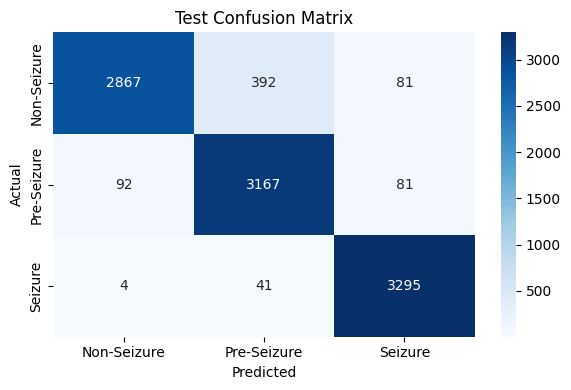

💾 Model saved as random_forest_model.pkl


In [8]:

if __name__ == "__main__":
    base_folder = "/kaggle/input/epilepsy-seizure-dataset-seina-scalp-complete/siena-scalp-eeg-database-1.0.0"
    X_all, y_all = [], []

    for subdir in os.listdir(base_folder):
        subpath = os.path.join(base_folder, subdir)
        if not os.path.isdir(subpath):
            continue

        summary_files = [f for f in os.listdir(subpath) if f.startswith("Seizures-list") and f.endswith(".txt")]
        if not summary_files:
            continue

        summary_path = os.path.join(subpath, summary_files[0])
        print(f"\n📁 Processing: {summary_path}")
        try:
            summary_data = parse_summary(summary_path)
            X, y = build_dataset(summary_data, subpath)
            if X is not None:
                X_all.append(X)
                y_all.append(y)
        except Exception as e:
            print(f"❌ Failed on {summary_path}: {e}")

    if X_all:
        X_all = np.concatenate(X_all)
        y_all = np.concatenate(y_all)
        print(f"\n✅ Final Dataset: {X_all.shape[0]} samples, {X_all.shape[1]} features")
        train_random_forest(X_all, y_all)
    else:
        print("❌ No valid data found.")


**XGB**

In [9]:
import joblib
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import numpy as np

def train_xgboost(X, y):
    print("\n📊 Original label distribution:", np.bincount(y))

    # ⚖️ Balance the classes
    smote = SMOTE(sampling_strategy={0: 33397, 1: 33397, 2: 33397}, random_state=42)
    X_res, y_res = smote.fit_resample(X, y)
    print("✅ After SMOTE label distribution:", np.bincount(y_res))

    # 🔀 Split data
    X_trainval, X_test, y_trainval, y_test = train_test_split(
        X_res, y_res, stratify=y_res, test_size=0.1, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(
        X_trainval, y_trainval, stratify=y_trainval, test_size=0.2, random_state=42)

    # 🚀 XGBoost Classifier
    clf = XGBClassifier(
        objective='multi:softmax',
        num_class=3,
        eval_metric='mlogloss',
        n_estimators=300,
        max_depth=7,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        use_label_encoder=False,
        random_state=42
    )

    # 🏋️‍♂️ Train
    clf.fit(X_train, y_train)

    # 📈 Training Evaluation
    print("\n📈 Training Set Evaluation")
    print(classification_report(
        y_train, clf.predict(X_train),
        target_names=["Non-Seizure", "Pre-Seizure", "Seizure"]
    ))

    # ✅ Validation Evaluation
    print("\n✅ Validation Report")
    print(classification_report(
        y_val, clf.predict(X_val),
        target_names=["Non-Seizure", "Pre-Seizure", "Seizure"]
    ))

    # 🧪 Test Evaluation
    y_test_pred = clf.predict(X_test)
    print("\n🧪 Test Report")
    print(classification_report(
        y_test, y_test_pred,
        target_names=["Non-Seizure", "Pre-Seizure", "Seizure"]
    ))

    # 🔍 Confusion Matrix
    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
                xticklabels=["Non-Seizure", "Pre-Seizure", "Seizure"],
                yticklabels=["Non-Seizure", "Pre-Seizure", "Seizure"])
    plt.title("XGBoost Test Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

    # 💾 Save model
    joblib.dump(clf, "xgboost_model.pkl")
    print("💾 Model saved as xgboost_model.pkl")



📁 Processing: /kaggle/input/epilepsy-seizure-dataset-seina-scalp-complete/siena-scalp-eeg-database-1.0.0/PN05/Seizures-list-PN05.txt

📁 Processing: /kaggle/input/epilepsy-seizure-dataset-seina-scalp-complete/siena-scalp-eeg-database-1.0.0/PN00/Seizures-list-PN00.txt

📁 Processing: /kaggle/input/epilepsy-seizure-dataset-seina-scalp-complete/siena-scalp-eeg-database-1.0.0/PN17/Seizures-list-PN17.txt

📁 Processing: /kaggle/input/epilepsy-seizure-dataset-seina-scalp-complete/siena-scalp-eeg-database-1.0.0/PN11/Seizures-list-PN11.txt
⚠️ Missing EDF: /kaggle/input/epilepsy-seizure-dataset-seina-scalp-complete/siena-scalp-eeg-database-1.0.0/PN11/PN11-.edf

📁 Processing: /kaggle/input/epilepsy-seizure-dataset-seina-scalp-complete/siena-scalp-eeg-database-1.0.0/PN14/Seizures-list-PN14.txt

📁 Processing: /kaggle/input/epilepsy-seizure-dataset-seina-scalp-complete/siena-scalp-eeg-database-1.0.0/PN07/Seizures-list-PN07.txt

📁 Processing: /kaggle/input/epilepsy-seizure-dataset-seina-scalp-complete

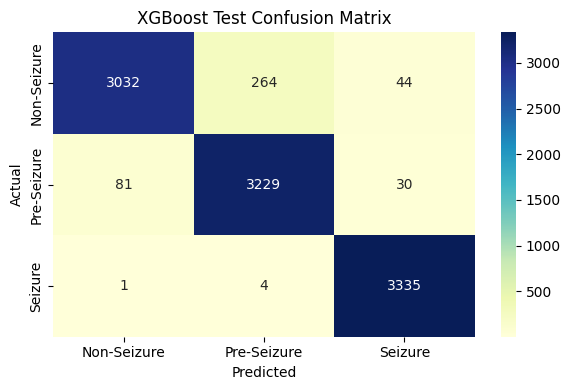

💾 Model saved as xgboost_model.pkl


In [10]:

if __name__ == "__main__":
    base_folder = "/kaggle/input/epilepsy-seizure-dataset-seina-scalp-complete/siena-scalp-eeg-database-1.0.0"
    X_all, y_all = [], []

    for subdir in os.listdir(base_folder):
        subpath = os.path.join(base_folder, subdir)
        if not os.path.isdir(subpath):
            continue

        summary_files = [f for f in os.listdir(subpath) if f.startswith("Seizures-list") and f.endswith(".txt")]
        if not summary_files:
            continue

        summary_path = os.path.join(subpath, summary_files[0])
        print(f"\n📁 Processing: {summary_path}")
        try:
            summary_data = parse_summary(summary_path)
            X, y = build_dataset(summary_data, subpath)
            if X is not None:
                X_all.append(X)
                y_all.append(y)
        except Exception as e:
            print(f"❌ Failed on {summary_path}: {e}")

    if X_all:
        X_all = np.concatenate(X_all)
        y_all = np.concatenate(y_all)
        print(f"\n✅ Final Dataset: {X_all.shape[0]} samples, {X_all.shape[1]} features")
        train_xgboost(X_all, y_all)
    else:
        print("❌ No valid data found.")


**Lightgbm**

In [11]:
pip install lightgbm


Note: you may need to restart the kernel to use updated packages.


In [12]:
from lightgbm import early_stopping, log_evaluation

from lightgbm import LGBMClassifier


In [13]:
def train_lightgbm(X, y):
    print("\n📊 Original label distribution:", np.bincount(y))

    # ⚖️ Use SMOTE to balance the dataset
    smote = SMOTE(sampling_strategy={0: 33397, 1: 33397, 2: 33397}, random_state=42)
    X_res, y_res = smote.fit_resample(X, y)
    print("✅ After SMOTE label distribution:", np.bincount(y_res))

    # 🔀 Train-validation-test split
    X_trainval, X_test, y_trainval, y_test = train_test_split(
        X_res, y_res, stratify=y_res, test_size=0.1, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(
        X_trainval, y_trainval, stratify=y_trainval, test_size=0.2, random_state=42)

    
    # 🌟 LightGBM Classifier
    clf = LGBMClassifier(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=15,
        num_leaves=31,
        class_weight='balanced',
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=-1
    )
    
    # 🏋️‍♂️ Train model
    clf.fit(
        X_train, y_train,
        eval_set=[(X_val, y_val)],
        eval_metric='multi_logloss',
        callbacks=[early_stopping(stopping_rounds=30), log_evaluation(period=50)]
    )
    # 📈 Training evaluation
    print("\n📈 Training Set Evaluation")
    print(classification_report(
        y_train, clf.predict(X_train),
        target_names=["Non-Seizure", "Pre-Seizure", "Seizure"]
    ))

    # ✅ Validation evaluation
    print("\n✅ Validation Report")
    print(classification_report(
        y_val, clf.predict(X_val),
        target_names=["Non-Seizure", "Pre-Seizure", "Seizure"]
    ))

    # 🧪 Test evaluation
    y_test_pred = clf.predict(X_test)
    print("\n🧪 Test Report")
    print(classification_report(
        y_test, y_test_pred,
        target_names=["Non-Seizure", "Pre-Seizure", "Seizure"]
    ))

    # 🔍 Confusion Matrix
    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
                xticklabels=["Non-Seizure", "Pre-Seizure", "Seizure"],
                yticklabels=["Non-Seizure", "Pre-Seizure", "Seizure"])
    plt.title("Test Confusion Matrix - LightGBM")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

    # 💾 Save model
    joblib.dump(clf, "lightgbm_model.pkl")
    print("💾 Model saved as lightgbm_model.pkl")



📁 Processing: /kaggle/input/epilepsy-seizure-dataset-seina-scalp-complete/siena-scalp-eeg-database-1.0.0/PN05/Seizures-list-PN05.txt

📁 Processing: /kaggle/input/epilepsy-seizure-dataset-seina-scalp-complete/siena-scalp-eeg-database-1.0.0/PN00/Seizures-list-PN00.txt

📁 Processing: /kaggle/input/epilepsy-seizure-dataset-seina-scalp-complete/siena-scalp-eeg-database-1.0.0/PN17/Seizures-list-PN17.txt

📁 Processing: /kaggle/input/epilepsy-seizure-dataset-seina-scalp-complete/siena-scalp-eeg-database-1.0.0/PN11/Seizures-list-PN11.txt
⚠️ Missing EDF: /kaggle/input/epilepsy-seizure-dataset-seina-scalp-complete/siena-scalp-eeg-database-1.0.0/PN11/PN11-.edf

📁 Processing: /kaggle/input/epilepsy-seizure-dataset-seina-scalp-complete/siena-scalp-eeg-database-1.0.0/PN14/Seizures-list-PN14.txt

📁 Processing: /kaggle/input/epilepsy-seizure-dataset-seina-scalp-complete/siena-scalp-eeg-database-1.0.0/PN07/Seizures-list-PN07.txt

📁 Processing: /kaggle/input/epilepsy-seizure-dataset-seina-scalp-complete

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

 Non-Seizure       1.00      0.97      0.98     24046
 Pre-Seizure       0.97      1.00      0.98     24045
     Seizure       1.00      1.00      1.00     24045

    accuracy                           0.99     72136
   macro avg       0.99      0.99      0.99     72136
weighted avg       0.99      0.99      0.99     72136


✅ Validation Report


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

 Non-Seizure       0.98      0.92      0.95      6011
 Pre-Seizure       0.93      0.98      0.95      6012
     Seizure       0.99      1.00      0.99      6012

    accuracy                           0.97     18035
   macro avg       0.97      0.97      0.97     18035
weighted avg       0.97      0.97      0.97     18035



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



🧪 Test Report
              precision    recall  f1-score   support

 Non-Seizure       0.98      0.92      0.95      3340
 Pre-Seizure       0.93      0.98      0.95      3340
     Seizure       0.99      1.00      0.99      3340

    accuracy                           0.97     10020
   macro avg       0.97      0.97      0.97     10020
weighted avg       0.97      0.97      0.97     10020



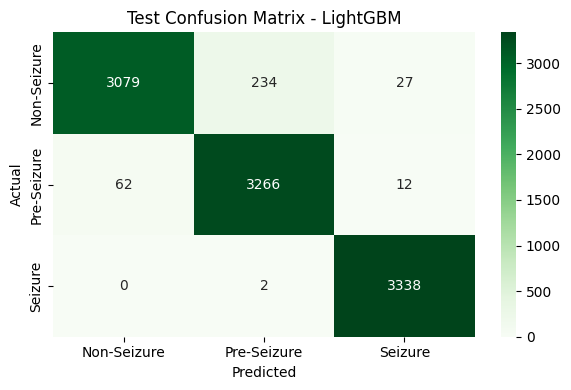

💾 Model saved as lightgbm_model.pkl


In [14]:

if __name__ == "__main__":
    base_folder = "/kaggle/input/epilepsy-seizure-dataset-seina-scalp-complete/siena-scalp-eeg-database-1.0.0"
    X_all, y_all = [], []

    for subdir in os.listdir(base_folder):
        subpath = os.path.join(base_folder, subdir)
        if not os.path.isdir(subpath):
            continue

        summary_files = [f for f in os.listdir(subpath) if f.startswith("Seizures-list") and f.endswith(".txt")]
        if not summary_files:
            continue

        summary_path = os.path.join(subpath, summary_files[0])
        print(f"\n📁 Processing: {summary_path}")
        try:
            summary_data = parse_summary(summary_path)
            X, y = build_dataset(summary_data, subpath)
            if X is not None:
                X_all.append(X)
                y_all.append(y)
        except Exception as e:
            print(f"❌ Failed on {summary_path}: {e}")

    if X_all:
        X_all = np.concatenate(X_all)
        y_all = np.concatenate(y_all)
        print(f"\n✅ Final Dataset: {X_all.shape[0]} samples, {X_all.shape[1]} features")
        train_lightgbm(X_all, y_all)
    else:
        print("❌ No valid data found.")


**Stacking**

In [15]:
import joblib
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

def stacking_ensemble(X, y):
    print("\n📊 Original label distribution:", np.bincount(y))

    # ⚖️ Apply SMOTE
    smote = SMOTE(sampling_strategy={0: 33397, 1: 33397, 2: 33397}, random_state=42)
    X_res, y_res = smote.fit_resample(X, y)
    print("✅ After SMOTE:", np.bincount(y_res))

    # 🔀 Split dataset
    X_trainval, X_test, y_trainval, y_test = train_test_split(
        X_res, y_res, stratify=y_res, test_size=0.1, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(
        X_trainval, y_trainval, stratify=y_trainval, test_size=0.2, random_state=42)

    # 💾 Load base models
    rf = joblib.load("random_forest_model.pkl")
    xgb = joblib.load("xgboost_model.pkl")
    lgb = joblib.load("lightgbm_model.pkl")

    # 🔮 Get base model predictions for training meta-model
    rf_train_pred = rf.predict(X_val).reshape(-1, 1)
    xgb_train_pred = xgb.predict(X_val).reshape(-1, 1)
    lgb_train_pred = lgb.predict(X_val).reshape(-1, 1)

    meta_X_train = np.hstack((rf_train_pred, xgb_train_pred, lgb_train_pred))
    meta_y_train = y_val

    # 🧠 Train meta-model
    meta_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
    meta_model.fit(meta_X_train, meta_y_train)

    # 📈 Evaluate on training set (stacking part)
    rf_train_pred = rf.predict(X_train).reshape(-1, 1)
    xgb_train_pred = xgb.predict(X_train).reshape(-1, 1)
    lgb_train_pred = lgb.predict(X_train).reshape(-1, 1)
    meta_X_train_full = np.hstack((rf_train_pred, xgb_train_pred, lgb_train_pred))
    final_train_pred = meta_model.predict(meta_X_train_full)

    
    print("\n📈 Stacking Ensemble - Training Report")
    print(classification_report(
        y_train, final_train_pred,
        target_names=["Non-Seizure", "Pre-Seizure", "Seizure"]
    ))

    # 🧪 Test predictions
    rf_test_pred = rf.predict(X_test).reshape(-1, 1)
    xgb_test_pred = xgb.predict(X_test).reshape(-1, 1)
    lgb_test_pred = lgb.predict(X_test).reshape(-1, 1)
    meta_X_test = np.hstack((rf_test_pred, xgb_test_pred, lgb_test_pred))
    final_test_pred = meta_model.predict(meta_X_test)

    print("\n🧪 Stacking Ensemble - Test Report")
    print(classification_report(
        y_test, final_test_pred,
        target_names=["Non-Seizure", "Pre-Seizure", "Seizure"]
    ))

    # 🔍 Confusion Matrix
    cm = confusion_matrix(y_test, final_test_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
                xticklabels=["Non-Seizure", "Pre-Seizure", "Seizure"],
                yticklabels=["Non-Seizure", "Pre-Seizure", "Seizure"])
    plt.title("Stacking Ensemble  - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()



📁 Processing: /kaggle/input/epilepsy-seizure-dataset-seina-scalp-complete/siena-scalp-eeg-database-1.0.0/PN05/Seizures-list-PN05.txt

📁 Processing: /kaggle/input/epilepsy-seizure-dataset-seina-scalp-complete/siena-scalp-eeg-database-1.0.0/PN00/Seizures-list-PN00.txt

📁 Processing: /kaggle/input/epilepsy-seizure-dataset-seina-scalp-complete/siena-scalp-eeg-database-1.0.0/PN17/Seizures-list-PN17.txt

📁 Processing: /kaggle/input/epilepsy-seizure-dataset-seina-scalp-complete/siena-scalp-eeg-database-1.0.0/PN11/Seizures-list-PN11.txt
⚠️ Missing EDF: /kaggle/input/epilepsy-seizure-dataset-seina-scalp-complete/siena-scalp-eeg-database-1.0.0/PN11/PN11-.edf

📁 Processing: /kaggle/input/epilepsy-seizure-dataset-seina-scalp-complete/siena-scalp-eeg-database-1.0.0/PN14/Seizures-list-PN14.txt

📁 Processing: /kaggle/input/epilepsy-seizure-dataset-seina-scalp-complete/siena-scalp-eeg-database-1.0.0/PN07/Seizures-list-PN07.txt

📁 Processing: /kaggle/input/epilepsy-seizure-dataset-seina-scalp-complete

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



📈 Stacking Ensemble - Training Report
              precision    recall  f1-score   support

 Non-Seizure       1.00      0.97      0.98     24046
 Pre-Seizure       0.97      1.00      0.98     24045
     Seizure       1.00      1.00      1.00     24045

    accuracy                           0.99     72136
   macro avg       0.99      0.99      0.99     72136
weighted avg       0.99      0.99      0.99     72136



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



🧪 Stacking Ensemble - Test Report
              precision    recall  f1-score   support

 Non-Seizure       0.98      0.92      0.95      3340
 Pre-Seizure       0.93      0.98      0.95      3340
     Seizure       0.99      1.00      0.99      3340

    accuracy                           0.96     10020
   macro avg       0.97      0.96      0.96     10020
weighted avg       0.97      0.96      0.96     10020



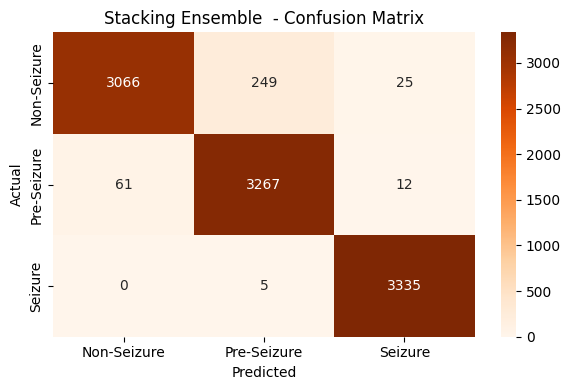

In [16]:

if __name__ == "__main__":
    base_folder = "/kaggle/input/epilepsy-seizure-dataset-seina-scalp-complete/siena-scalp-eeg-database-1.0.0"
    X_all, y_all = [], []

    for subdir in os.listdir(base_folder):
        subpath = os.path.join(base_folder, subdir)
        if not os.path.isdir(subpath):
            continue

        summary_files = [f for f in os.listdir(subpath) if f.startswith("Seizures-list") and f.endswith(".txt")]
        if not summary_files:
            continue

        summary_path = os.path.join(subpath, summary_files[0])
        print(f"\n📁 Processing: {summary_path}")
        try:
            summary_data = parse_summary(summary_path)
            X, y = build_dataset(summary_data, subpath)
            if X is not None:
                X_all.append(X)
                y_all.append(y)
        except Exception as e:
            print(f"❌ Failed on {summary_path}: {e}")

    if X_all:
        X_all = np.concatenate(X_all)
        y_all = np.concatenate(y_all)
        print(f"\n✅ Final Dataset: {X_all.shape[0]} samples, {X_all.shape[1]} features")
        stacking_ensemble(X_all, y_all)
    else:
        print("❌ No valid data found.")


Bagging

In [37]:
import joblib
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

def bagging_classifier_ensemble(X, y, n_estimators=10):
    print("\n📊 Original label distribution:", np.bincount(y))

    # ⚖️ Apply SMOTE
    smote = SMOTE(sampling_strategy={0: 33397, 1: 33397, 2: 33397}, random_state=42)
    X_res, y_res = smote.fit_resample(X, y)
    print("✅ After SMOTE:", np.bincount(y_res))

    # 🔀 Split dataset
    X_train, X_test, y_train, y_test = train_test_split(
        X_res, y_res, stratify=y_res, test_size=0.1, random_state=42)

    # 🌲 Base estimator
    base_estimator = DecisionTreeClassifier(max_depth=24,random_state=42)

    # 🧠 Bagging Classifier
    bagging = BaggingClassifier(
        estimator=base_estimator,
        n_estimators=n_estimators,
        max_samples=1.0,
        bootstrap=True,
        n_jobs=-1,
        random_state=42
    )

    # 📦 Train
    bagging.fit(X_train, y_train)
    joblib.dump(bagging, "bagging_classifier_model.pkl")

    # 📈 Training Report
    train_preds = bagging.predict(X_train)
    print("\n📈 BaggingClassifier - Training Report")
    print(classification_report(
        y_train, train_preds,
        target_names=["Non-Seizure", "Pre-Seizure", "Seizure"]
    ))

    # 🧪 Test Report
    test_preds = bagging.predict(X_test)
    print("\n🧪 BaggingClassifier - Test Report")
    print(classification_report(
        y_test, test_preds,
        target_names=["Non-Seizure", "Pre-Seizure", "Seizure"]
    ))

    # 🔍 Confusion Matrix
    cm = confusion_matrix(y_test, test_preds)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
                xticklabels=["Non-Seizure", "Pre-Seizure", "Seizure"],
                yticklabels=["Non-Seizure", "Pre-Seizure", "Seizure"])
    plt.title("BaggingClassifier - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()



📁 Processing: /kaggle/input/epilepsy-seizure-dataset-seina-scalp-complete/siena-scalp-eeg-database-1.0.0/PN05/Seizures-list-PN05.txt

📁 Processing: /kaggle/input/epilepsy-seizure-dataset-seina-scalp-complete/siena-scalp-eeg-database-1.0.0/PN00/Seizures-list-PN00.txt

📁 Processing: /kaggle/input/epilepsy-seizure-dataset-seina-scalp-complete/siena-scalp-eeg-database-1.0.0/PN17/Seizures-list-PN17.txt

📁 Processing: /kaggle/input/epilepsy-seizure-dataset-seina-scalp-complete/siena-scalp-eeg-database-1.0.0/PN11/Seizures-list-PN11.txt
⚠️ Missing EDF: /kaggle/input/epilepsy-seizure-dataset-seina-scalp-complete/siena-scalp-eeg-database-1.0.0/PN11/PN11-.edf

📁 Processing: /kaggle/input/epilepsy-seizure-dataset-seina-scalp-complete/siena-scalp-eeg-database-1.0.0/PN14/Seizures-list-PN14.txt

📁 Processing: /kaggle/input/epilepsy-seizure-dataset-seina-scalp-complete/siena-scalp-eeg-database-1.0.0/PN07/Seizures-list-PN07.txt

📁 Processing: /kaggle/input/epilepsy-seizure-dataset-seina-scalp-complete

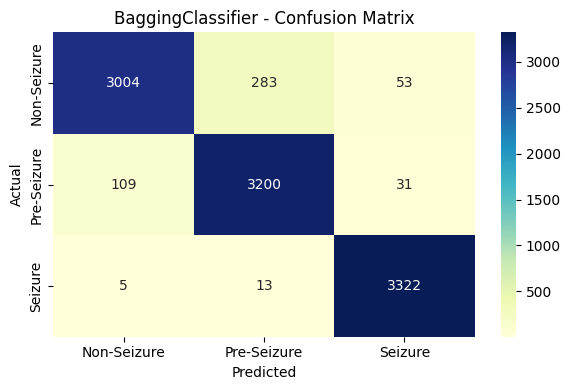

In [38]:

if __name__ == "__main__":
    base_folder = "/kaggle/input/epilepsy-seizure-dataset-seina-scalp-complete/siena-scalp-eeg-database-1.0.0"
    X_all, y_all = [], []

    for subdir in os.listdir(base_folder):
        subpath = os.path.join(base_folder, subdir)
        if not os.path.isdir(subpath):
            continue

        summary_files = [f for f in os.listdir(subpath) if f.startswith("Seizures-list") and f.endswith(".txt")]
        if not summary_files:
            continue

        summary_path = os.path.join(subpath, summary_files[0])
        print(f"\n📁 Processing: {summary_path}")
        try:
            summary_data = parse_summary(summary_path)
            X, y = build_dataset(summary_data, subpath)
            if X is not None:
                X_all.append(X)
                y_all.append(y)
        except Exception as e:
            print(f"❌ Failed on {summary_path}: {e}")

    if X_all:
        X_all = np.concatenate(X_all)
        y_all = np.concatenate(y_all)
        print(f"\n✅ Final Dataset: {X_all.shape[0]} samples, {X_all.shape[1]} features")
        bagging_classifier_ensemble(X_all, y_all)
    else:
        print("❌ No valid data found.")
